In [65]:
# Import dependencies (Working)
import pandas as pd
import math
import matplotlib.pyplot as plt

In [66]:
# Split the dataset by class values, returns a dictionary (Working)
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if(vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

#separateByClass(pd.read_csv("../Data/TrainingData.csv").values)

In [67]:
# Calculate mean, standard deviation (Working)
def mean(numericalValues):
    return sum(numericalValues)/float(len(numericalValues))

def standardDeviation(numericalValues):
    average = mean(numericalValues)
    variance = sum([pow(x-average,2) for x in numericalValues])/float(len(numericalValues)-1)
    stdDev = math.sqrt(variance)
    if stdDev == 0.0:
        stdDev = 0.001
    return stdDev
    

In [68]:
# Summarize (Working)
def summarize(dataset):
    summaries = [(mean(attribute),standardDeviation(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

#summarize(pd.read_csv("../Data/TrainingData.csv").values)

In [69]:
# Summarize by class (Working)
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = dict()
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)

    return summaries

#summarizeByClass(pd.read_csv("../Data/TrainingData.csv").values)

In [70]:
# Calculating probability (Working)
def calculateProbability(x,mean,standardDeviation):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(standardDeviation,2))))
    probability = (1/(math.sqrt(2*math.pi)*standardDeviation))*exponent
    return probability


In [71]:
# Calculate class probability (Working)
def calculateClassProbabilities(summaries,inputVector):
    probabilities = dict()
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, standardDeviation = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x,mean,standardDeviation)
    return probabilities 

In [72]:
# Predict (Working)
def predict(summaries,inputVector):
    probabilities = calculateClassProbabilities(summaries,inputVector)
    bestLabel, bestProbability = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProbability:
            bestProbability = probability
            bestLabel = classValue
    return bestLabel


In [73]:
# Get all predictions (Working)
def getPredictions(summaries,testingData):
    predictions = []
    for i in range(len(testingData)):
        result = predict(summaries,testingData[i])
        predictions.append(result)
    return predictions

In [74]:
# Calculate accuracy (Working)
def calculateAccuracy(testingData,predictions):
    correct = 0
    results = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    for i in range(len(results)):
        if results[i] == predictions[i]:
            correct += 1
    return correct/len(results)*100

In [75]:
# Main script to call functions
trainingData = pd.read_csv("../Data/TrainingData.csv").values
testingData = pd.read_csv("../Data/TestingData.csv").values
summaries = summarizeByClass(trainingData)
predictions = getPredictions(summaries,testingData)
accuracy = calculateAccuracy(testingData,predictions)
print("Training data: {} rows x {} columns ".format(trainingData.shape[0],trainingData.shape[1]))
print("Testing data: {} rows x {} columns".format(testingData.shape[0],testingData.shape[1]))
print("Accuracy of Naive Bayes: {}%".format(accuracy))

Training data: 48 rows x 22 columns 
Testing data: 16 rows x 21 columns
Accuracy of Naive Bayes: 43.75%


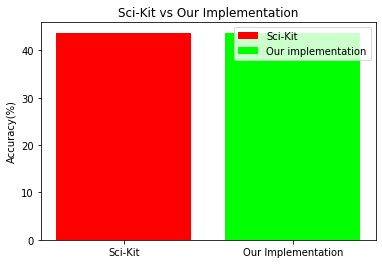

In [76]:
# VISUALIZATION
methods = ["Sci-Kit","Our Implementation"]
accuracies = [43.75,43.75]
plt.title("Sci-Kit vs Our Implementation")
plt.xlabel("")
plt.ylabel("Accuracy(%)")
plt.bar(methods[0], accuracies[0], color = "red", label = "Sci-Kit")
plt.bar(methods[1], accuracies[1], color = "lime", label = "Our implementation")
plt.legend()
plt.show()
